In [54]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# Import the "data science salaries" dataset
df = pd.read_csv('C:\\Rohan\\SharpestMinds - Projects\\Project 8\\ds_salaries.csv')

## Data Understanding

In [75]:
# Obtain the first 5 rows of this dataset
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [76]:
# Obtain the last 5 rows of this dataset
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


Unnamed: 0: This column appears to be an index column that assigns a unique identifier to each row. It doesn't contain any meaningful information related to the dataset itself.

work_year: This attribute represents the year of work or employment for the given job position. It indicates the specific year in which the data was recorded or the work experience year of the employee.

experience_level: This column refers to the level of experience or expertise required for the job position. It could represent different categories such as entry-level, junior, mid-level, senior, etc.

employment_type: This attribute indicates the type of employment for the job position, such as full-time (FT), part-time (PT), contract, or freelance. It specifies the nature of the employment agreement or arrangement.

job_title: This column represents the job title or position for the given role in the dataset. It describes the specific role or function of the employee within the data science field.

salary: This attribute indicates the salary for the given job position. It represents the salary amount in the currency specified in the 'salary_currency' column.

salary_currency: This column specifies the currency in which the salary is provided. It indicates the currency unit for the corresponding salary amount.

salary_in_usd: This attribute represents the salary amount converted to US dollars (USD). It provides a standardized representation of the salary amount across different currencies for easier comparison.

employee_residence: This column refers to the country or region where the employee resides or is located.

remote_ratio: This attribute represents the percentage of remote work allowed or the ratio of remote work for the given job position. It indicates the extent to which remote work is possible or allowed for the employee.

company_location: This column indicates the location or country where the company or organization is based.

company_size: This attribute represents the size or scale of the company. It could represent the number of employees, revenue, market capitalization, or other relevant metrics that determine the company's size.

In [58]:
# Obtain the dimensions of this dataset
df.shape

(607, 12)

In [59]:
# Obtain the columns of this dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

This dataset has 607 rows and 12 columns

In [60]:
# Obtain the data types for each of the attributes
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [61]:
# Obtain more info for each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


This dataset has about 5 numeric attributes & 7 categorical attributes. Overall, we can see that this data is well-structured with no missing values.

## Data Cleaning
Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves handling missing values, dealing with outliers, standardizing formats, correcting erroneous entries, and ensuring data integrity.

In the context of data analysis, data cleaning is crucial for several reasons:

Accuracy: Data cleaning helps improve the accuracy of the analysis by eliminating errors and inconsistencies. By identifying and rectifying data issues, you can ensure that your analysis is based on reliable and trustworthy information.

Reliable Insights: Clean data leads to more reliable and meaningful insights. By addressing data quality issues, you can reduce the risk of drawing incorrect conclusions or making faulty decisions based on flawed data.

Consistency: Data cleaning ensures consistency across the dataset by standardizing formats and resolving inconsistencies. This consistency allows for proper comparisons and aggregations, enabling more accurate and meaningful analysis.

Data Completeness: Handling missing values is an essential part of data cleaning. By appropriately dealing with missing data, you avoid potential biases or inaccuracies that could arise if incomplete records are not accounted for.

Data Integration: In many cases, data for analysis comes from multiple sources. Data cleaning helps in integrating and merging datasets by aligning variables, resolving discrepancies, and ensuring compatibility. This integration allows for more comprehensive analysis and insights.

Efficiency: By cleaning and preparing the data upfront, you can streamline the analysis process. It reduces the time and effort required for troubleshooting or revisiting data quality issues during analysis.

### Handling Missing Values

In [62]:
# Obtain the number of missing values for each attribute
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

We can see that none of the attributes have any missing values.

### Handling Duplicates


In [63]:
# Obtain the total number of duplicate records
duplicate_records = df.duplicated()

# Count the total number of duplicate records
total_duplicates = duplicate_records.sum()

print("Total number of duplicate records:", total_duplicates)

Total number of duplicate records: 0


There are no duplicate records

### Outlier Detection
An outlier is an observation or data point that significantly deviates from other observations in a dataset. It is a value that lies an abnormal distance away from other values, which can be either unusually high or low compared to the majority of the data.

Detecting outliers is important in the context of analyzing a dataset, including the one you mentioned, for several reasons:

Data Quality: Outliers can indicate potential data quality issues, such as measurement errors, data entry mistakes, or sensor malfunctions. Identifying and investigating outliers helps ensure the overall quality and accuracy of the dataset.

Statistical Analysis: Outliers can have a significant impact on statistical analysis. They can distort summary statistics, such as the mean and standard deviation, leading to misleading conclusions or skewed results. By detecting and appropriately handling outliers, you can obtain more accurate statistical measures and improve the validity of your analysis.

Anomaly Detection: Outliers can represent unusual or unexpected behavior in the data. By detecting and analyzing outliers, you can uncover important patterns, anomalies, or insights that might not be apparent when considering only the majority of the data points. Outliers can highlight rare events, exceptional cases, or outliers that require further investigation or action.

Model Performance: Outliers can have a detrimental effect on the performance of data models and machine learning algorithms. Models trained on datasets with outliers may be overly sensitive to those extreme values, resulting in poor generalization and predictive accuracy. Identifying and appropriately handling outliers can help improve the performance and robustness of your models.

Data Normalization: Outliers can affect data normalization techniques, such as rescaling or standardization. Outliers may lead to skewed distributions or impact the scaling of variables. By detecting and addressing outliers, you can ensure that normalization techniques accurately represent the underlying patterns and distributions in the data.

Data Visualization: Outliers can influence the visualization of data, making it difficult to interpret and understand patterns. By detecting and handling outliers, you can create more meaningful and accurate visualizations that effectively convey insights and trends in the data.

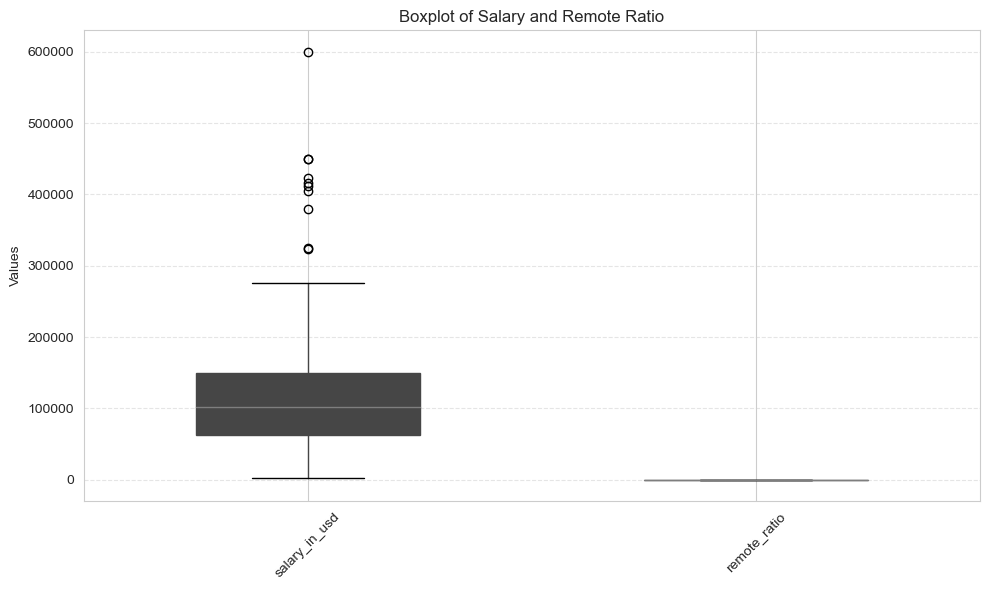

In [64]:
# Specify the columns to include in the boxplot
columns_to_plot = ['salary_in_usd', 'remote_ratio']

# Create a boxplot
plt.figure(figsize=(10, 6))  # Set the figure size
df[columns_to_plot].boxplot(sym='o', patch_artist=True, widths=0.5)

# Customize the plot
plt.title('Boxplot of Salary and Remote Ratio')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize the fill colors of the boxes
colors = ['lightblue', 'lightgreen']
for i, box in enumerate(plt.gca().artists):
    box.set_facecolor(colors[i])

# Display the plot
plt.tight_layout()
plt.show()

We can see that the attribute "salary_in_usd" has a few outliers.

## Summary Statistics



In [65]:
# Obtain the statistical summary
sub_df = df.drop(['Unnamed: 0', 'work_year'], axis = 1)
sub_df.describe()

,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


Salary:

The average salary is approximately $324,000.

The standard deviation is around $1,544,000, indicating a wide variation in salary amounts.

The minimum salary is $4,000, and the maximum salary is $30,400,000.

Salary in USD:

The average salary in USD is approximately $112,300.

The standard deviation is around $70,900, indicating a moderate variation in salary amounts.

The minimum salary in USD is $2,859, and the maximum salary in USD is $600,000.

Remote Ratio:

On average, about 70% of the positions allow for remote work.

The standard deviation is approximately 40, indicating a significant variation in remote work ratios.

The minimum remote work ratio is 0%, indicating no remote work option, while the maximum is 100%, indicating fully remote positions.

In [135]:
# Convert the data type for the attribute "work_year" from numeric to varchar type
df['work_year'] = df['work_year'].astype(str)

In [136]:
# Drop the attribute "salary"
df = df.drop({'salary'}, axis = 1)

In [137]:
# Replace the values in the "remote_ratio" column
df['remote_ratio'] = df['remote_ratio'].replace({0: 'No Remote Work', 50: 'Partially Remote', 100: 'Fully Remote'})
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,EUR,79833,DE,No Remote Work,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,No Remote Work,JP,S
2,2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,Partially Remote,GB,M
3,3,2020,MI,FT,Product Data Analyst,USD,20000,HN,No Remote Work,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,Partially Remote,US,L


In [68]:
# Provide the count for the "employment_type"
employment_type_count = df.groupby('employment_type').size()

print(employment_type_count)

employment_type
CT      5
FL      4
FT    588
PT     10
dtype: int64


From the output, we can see that the majority of the data science professionals are working Full-Time and a few of them are working in part-time, contract & freelance positions. 

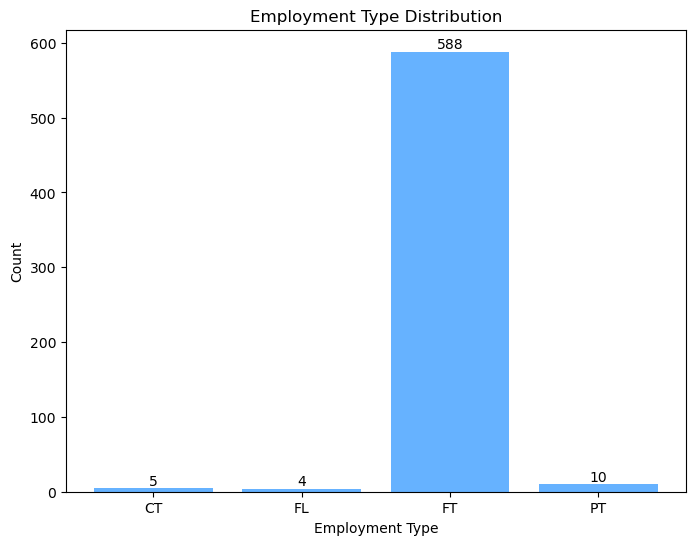

In [21]:
import matplotlib.pyplot as plt

# Define the data
employment_type = ['CT', 'FL', 'FT', 'PT']
count = [5, 4, 588, 10]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(employment_type, count, color='#66B2FF')

# Add data labels to the bars
for i, v in enumerate(count):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Customize the plot
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Display the plot
plt.show()


In [23]:
# Obtain the counts for each of the job titles
job_title_counts = df['job_title'].value_counts(ascending=False)

print(job_title_counts)

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

The most common job titles include "Data Scientist", "Data Engineer", and "Data Analyst", indicating that these roles are prominent in the dataset.

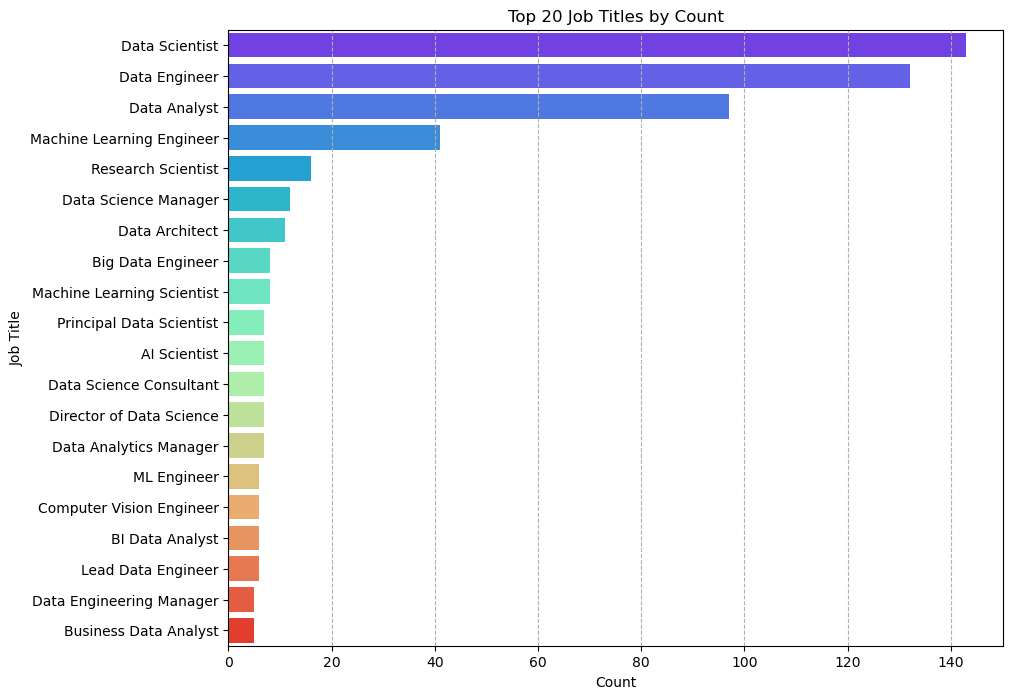

In [25]:
# Create a very attractive bar chart representing the 20 most popular job titles
top_20_job_title_counts = job_title_counts.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_job_title_counts.values, y=top_20_job_title_counts.index, palette='rainbow')

# Customize the plot
plt.title('Top 20 Job Titles by Count')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.grid(axis='x', linestyle='--')

# Display the plot
plt.show()

In [26]:
# Provide the experience level count
experience_level_counts = df['experience_level'].value_counts()

print(experience_level_counts)

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


SE (Senior): There are 280 records with the experience level "Senior".

MI (Mid-Level): There are 213 records with the experience level "Mid-Level".

EN (Entry-Level): There are 88 records with the experience level "Entry-Level".

EX (Executive): There are 26 records with the experience level "Executive".

Inferences:

Seniority Distribution: The larger count for "Senior" experience level suggests that experienced professionals are more prevalent in the dataset. This could indicate a higher demand for experienced data science practitioners or a focus on hiring senior-level talent.

Talent Pipeline: The counts for "Mid-Level" and "Entry-Level" indicate the presence of professionals at different stages of their careers. This suggests a balanced mix of mid-level practitioners with some entry-level individuals entering the field of data science.

Executive Positions: The smaller count for "Executive" experience level suggests that there are fewer individuals in leadership or executive roles related to data science within the dataset. This could indicate a focus on technical roles rather than managerial or executive positions.

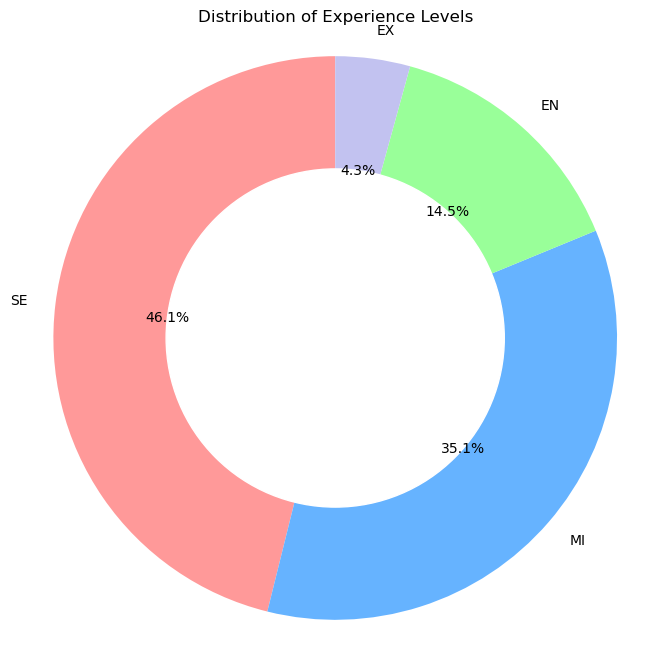

In [27]:
# Create a donut chart that displays the distribution of the various experience levels
# Assuming the result is stored in a Series called 'experience_level_counts'
labels = experience_level_counts.index
sizes = experience_level_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Customize the plot
plt.title('Distribution of Experience Levels')
plt.axis('equal')

# Display the plot
plt.show()

In [50]:
# Obtain the number of employees grouped by the experience level & company size
experience_level_counts = df.groupby(['experience_level', 'company_size']).size().reset_index(name='count')
experience_level_counts


,experience_level,company_size,count
0,EN,L,29
1,EN,M,30
2,EN,S,29
3,EX,L,11
4,EX,M,12
5,EX,S,3
6,MI,L,86
7,MI,M,98
8,MI,S,29
9,SE,L,72


Experience Level 'EN' (Entry Level):

Large Company Size: 29 employees

Medium Company Size: 30 employees

Small Company Size: 29 employees

Experience Level 'EX' (Experienced):

Large Company Size: 11 employees

Medium Company Size: 12 employees

Small Company Size: 3 employees

Experience Level 'MI' (Mid-Level):

Large Company Size: 86 employees

Medium Company Size: 98 employees

Small Company Size: 29 employees

Experience Level 'SE' (Senior):

Large Company Size: 72 employees

Medium Company Size: 186 employees

Small Company Size: 22 employees

Inferences:

The majority of employees fall into the 'SE' experience level, indicating a significant presence of senior-level employees.

Mid-level employees ('MI') also constitute a considerable portion of the workforce.

Large company sizes have a more balanced distribution across experience levels, while smaller company sizes have a relatively lower number of employees in each experience level.

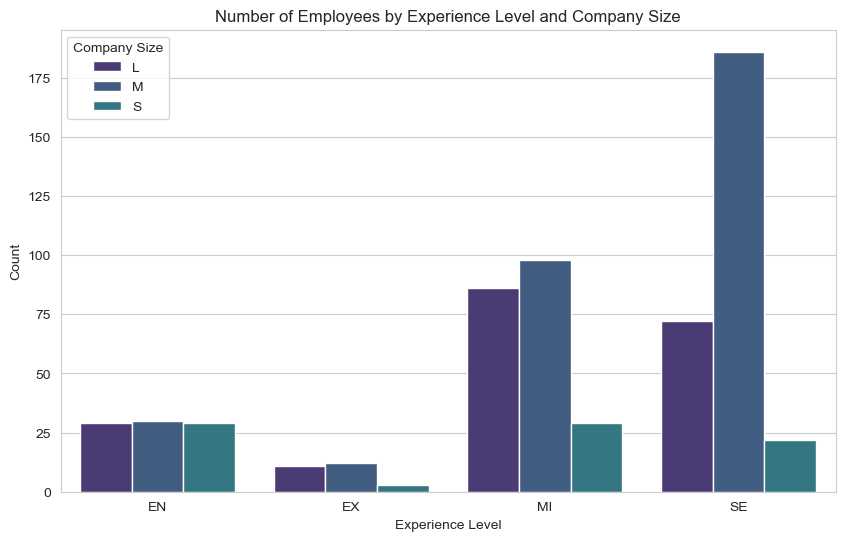

In [51]:
# Create a bar chart for the same
import seaborn as sns
import matplotlib.pyplot as plt

# Create the data for the chart
data = {
    'experience_level': ['EN', 'EN', 'EN', 'EX', 'EX', 'EX', 'MI', 'MI', 'MI', 'SE', 'SE', 'SE'],
    'company_size': ['L', 'M', 'S', 'L', 'M', 'S', 'L', 'M', 'S', 'L', 'M', 'S'],
    'count': [29, 30, 29, 11, 12, 3, 86, 98, 29, 72, 186, 22]
}

# Create a dataframe from the data
df = pd.DataFrame(data)

# Set the style of the plot
sns.set_style("whitegrid")

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='count', hue='company_size', data=df)

# Set the labels and title
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Number of Employees by Experience Level and Company Size')

# Display the plot
plt.legend(title='Company Size')
plt.show()


In [28]:
# Provide the count for "employee_residence"
employee_residence_counts = df['employee_residence'].value_counts()

print(employee_residence_counts)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64


The output represents the count of employee residences for the given dataset. Each country code represents a different country, and the count represents the number of employees residing in each country.

Interpretation:

US: The dataset contains the highest number of employees residing in the United States, with a count of 332.

GB: The second-highest count is for employees residing in the United Kingdom, with a count of 44.

IN, CA, DE, FR, ES, GR, JP, PT, BR, PK, NL, PL, IT, RU, AE, AT, VN, TR, AU, RO, BE, SG, SI, DK, HU, NG, MX: These countries have varying counts of employees residing in them, ranging from 30 to 2.

The remaining countries have a count of 1 employee residing in each.

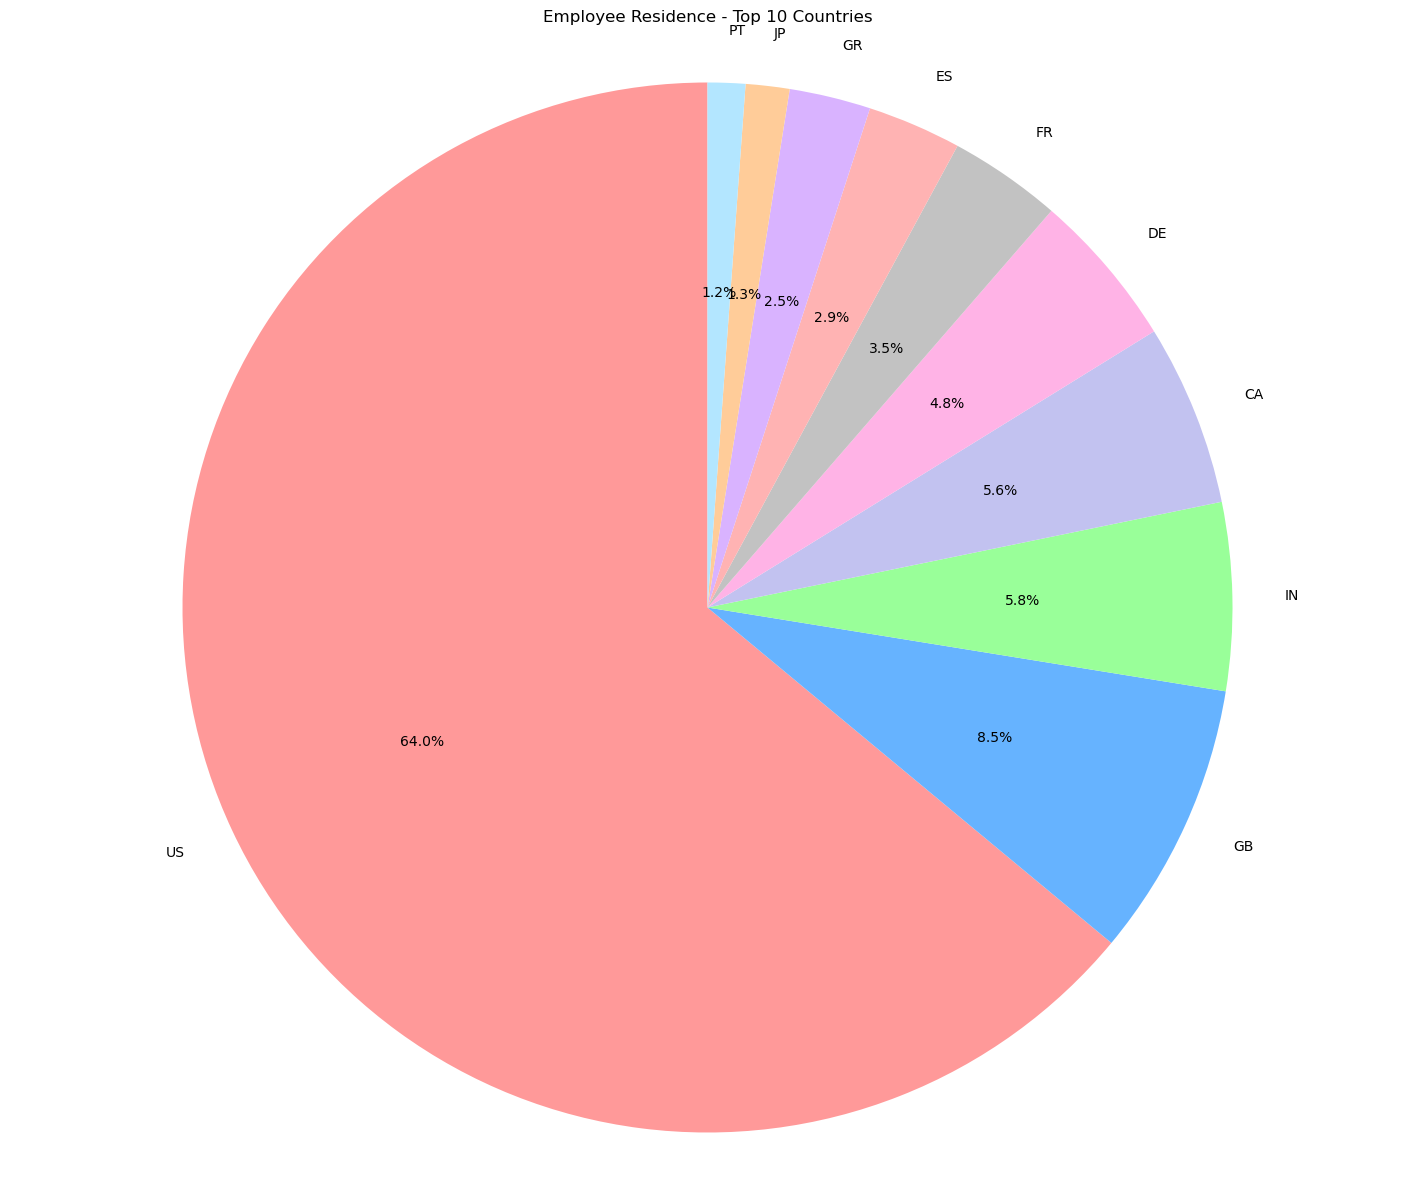

In [30]:
# Provide the employee residence counts for the top 10 countries by count & create a pie chart
top_10_countries = employee_residence_counts.head(10)

labels = top_10_countries.index
sizes = top_10_countries.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6', '#c2c2c2', '#ffb3b3', '#d9b3ff', '#ffcc99', '#b3e6ff']

plt.figure(figsize=(18, 15))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Employee Residence - Top 10 Countries')
plt.axis('equal')

# Display the plot
plt.show()

About 64% of the employees resided in the US

In [31]:
# Obtain the counts for the "company_size"
company_size_counts = df['company_size'].value_counts()

print(company_size_counts)

M    326
L    198
S     83
Name: company_size, dtype: int64


We can see that the majority of the companies that these employees worked for were mid-sized and only a few of the companies are small in size consisting of a few employees.

In [138]:
import pandas as pd

# Define the salary ranges and labels
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['< $50k', '$50k - $100k', '$100k - $150k', '$150k - $200k', '> $200k']

# Apply the case statement using pd.cut()
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels, right=False)

# Display the result
print(df[['salary_in_usd', 'salary_category']])

     salary_in_usd salary_category
0            79833    $50k - $100k
1           260000         > $200k
2           109024   $100k - $150k
3            20000          < $50k
4           150000   $150k - $200k
..             ...             ...
602         154000   $150k - $200k
603         126000   $100k - $150k
604         129000   $100k - $150k
605         150000   $150k - $200k
606         200000         > $200k

[607 rows x 2 columns]


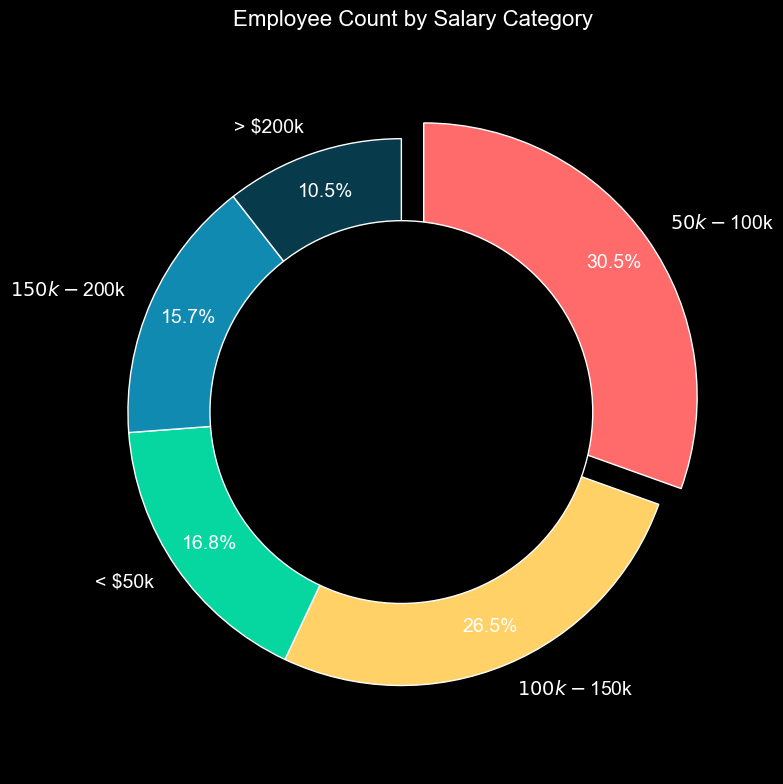

In [139]:
# Create a donut chart for the same
# Group the data by salary category and get the count
salary_count = df['salary_category'].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#FF6B6B', '#FFD166', '#06D6A0', '#118AB2', '#073B4C']
explode = (0.1, 0, 0, 0, 0)

# Set the black background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot the donut chart
wedges, texts, autotexts = ax.pie(salary_count, labels=salary_count.index, colors=colors, autopct='%1.1f%%',
                                  startangle=90, counterclock=False, pctdistance=0.85, explode=explode)

# Set properties for text labels
plt.setp(autotexts, size=14, color='white')
plt.setp(texts, size=14, color='white')

# Add a circle at the center to create a donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='black')
fig.gca().add_artist(center_circle)

# Add a title
plt.title('Employee Count by Salary Category', color='white', size=16)

# Display the donut chart
plt.axis('equal')
plt.tight_layout()
plt.show()

From the given output, one can infer that majority of the employees (30%) earn salaries in the range of 50K-100K followed by approx 26.5% of them who earn a salary in the range of 100K-150K. Only about 10.5% of the employees earn above $200K. 

In [32]:
# Obtain the average salaries for the employees grouped by their experience level
average_salaries = df.groupby('experience_level')['salary_in_usd'].mean()

print(average_salaries)


experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64


EN (Entry Level): The average salary for employees with entry-level experience is approximately $61,643. This suggests that employees with less experience generally earn lower salaries compared to other experience levels.

EX (Executive Level): The average salary for employees with executive-level experience is significantly higher, at around $199,392. This indicates that employees with extensive experience and senior positions tend to command higher salaries.

MI (Mid-Level): The average salary for employees with mid-level experience is approximately $87,996. This category represents employees who have gained some experience but are not yet in senior or executive roles. Their salaries are lower than those at the executive level but higher than entry-level salaries.

SE (Senior Level): Employees with senior-level experience have an average salary of approximately $138,617. This suggests that employees with significant experience and expertise in their field tend to earn higher salaries compared to those at lower experience levels.

In [33]:
# Obtain the average salaries grouped by the employment type
average_salaries = df.groupby('employment_type')['salary_in_usd'].mean()

print(average_salaries)

employment_type
CT    184575.000000
FL     48000.000000
FT    113468.073129
PT     33070.500000
Name: salary_in_usd, dtype: float64


The output provides average salaries in USD (salary_in_usd) based on different employment types. Here's what we can infer:

CT (Contract) employment type has the highest average salary, with an average of $184,575.

FT (Full-Time) employment type follows with an average salary of $113,468.073129.

PT (Part-Time) employment type has a lower average salary compared to CT and FT, with an average of $33,070.5.

FL (Freelance) employment type has the lowest average salary among the listed types, with an average of $48,000.


Salary Variation: The output highlights that there is significant variation in average salaries based on different employment types.

Contract vs. Full-Time: The highest average salary is associated with the Contract (CT) employment type, indicating that individuals working on contractual basis tend to earn more compared to full-time employees (FT).

Part-Time and Freelance: The average salaries for Part-Time (PT) and Freelance (FL) employment types are comparatively lower than Contract and Full-Time positions.

Career Decisions: These salary insights can be useful for individuals considering different employment types. Contract positions may offer higher earning potential, while Full-Time positions provide stable income. Part-Time and Freelance roles may have lower average salaries but offer flexibility.

Salary Expectations: Individuals seeking employment can use this information to set realistic salary expectations based on the type of employment they are pursuing.

Compensation Strategies: Companies can analyze the average salaries for different employment types to inform their compensation strategies and ensure they remain competitive in the market.

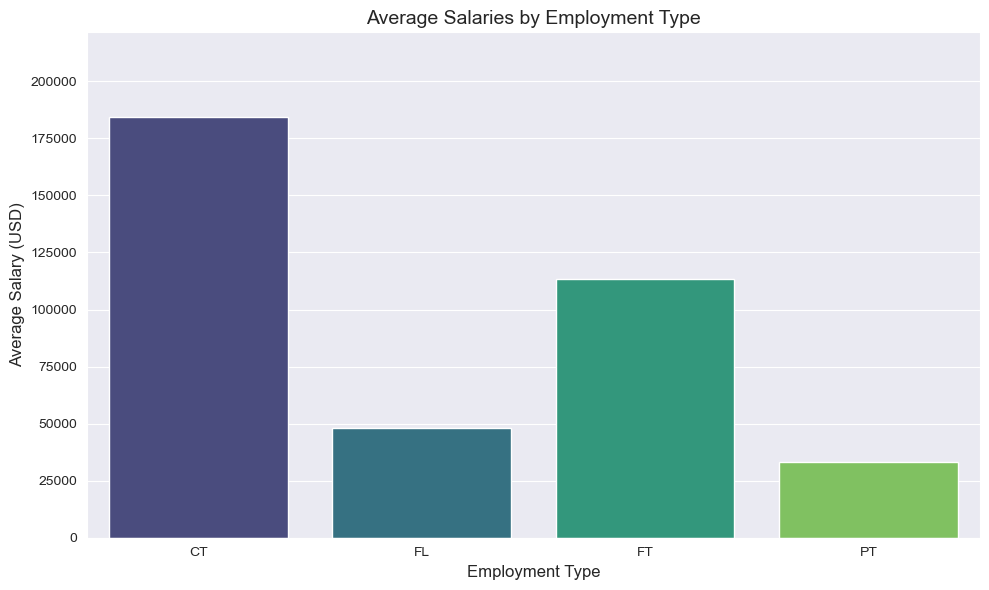

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Employment types
employment_types = ['CT', 'FL', 'FT', 'PT']

# Average salaries
average_salaries = [184575.0, 48000.0, 113468.073129, 33070.5]

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_types, y=average_salaries, palette='viridis')

# Customizing the chart
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.title('Average Salaries by Employment Type', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(average_salaries) * 1.2)

# Displaying the chart
plt.tight_layout()
plt.show()


In [34]:
# Obtain the average salaries grouped by the "job title"
average_salaries = df.groupby('job_title')['salary_in_usd'].mean()

print(average_salaries)

job_title
3D Computer Vision Researcher                 5409.000000
AI Scientist                                 66135.571429
Analytics Engineer                          175000.000000
Applied Data Scientist                      175655.000000
Applied Machine Learning Scientist          142068.750000
BI Data Analyst                              74755.166667
Big Data Architect                           99703.000000
Big Data Engineer                            51974.000000
Business Data Analyst                        76691.200000
Cloud Data Engineer                         124647.000000
Computer Vision Engineer                     44419.333333
Computer Vision Software Engineer           105248.666667
Data Analyst                                 92893.061856
Data Analytics Engineer                      64799.250000
Data Analytics Lead                         405000.000000
Data Analytics Manager                      127134.285714
Data Architect                              177873.909091
Data

The output shows different job titles in the "job_title" column, followed by the corresponding average salary in USD (salary_in_usd) for each job title.

The highest average salary is associated with the job title "Data Analytics Lead," which has an average salary of $405,000.

Other job titles with relatively high average salaries include "Director of Data Science" ($195,074), "Principal Data Scientist" ($215,242), and "Director of Data Engineering" ($156,738).

Job titles such as "AI Scientist," "Applied Data Scientist," and "Data Architect" also offer above-average salaries compared to the overall dataset.

On the lower end of the salary scale, we have job titles like "3D Computer Vision Researcher," "NLP Engineer," and "Product Data Analyst."

The salaries can vary significantly based on job titles and the skill sets required for each role.
This information can help identify the job titles that tend to offer higher salaries and provide a general understanding of the salary ranges associated with different data science and analytics positions.

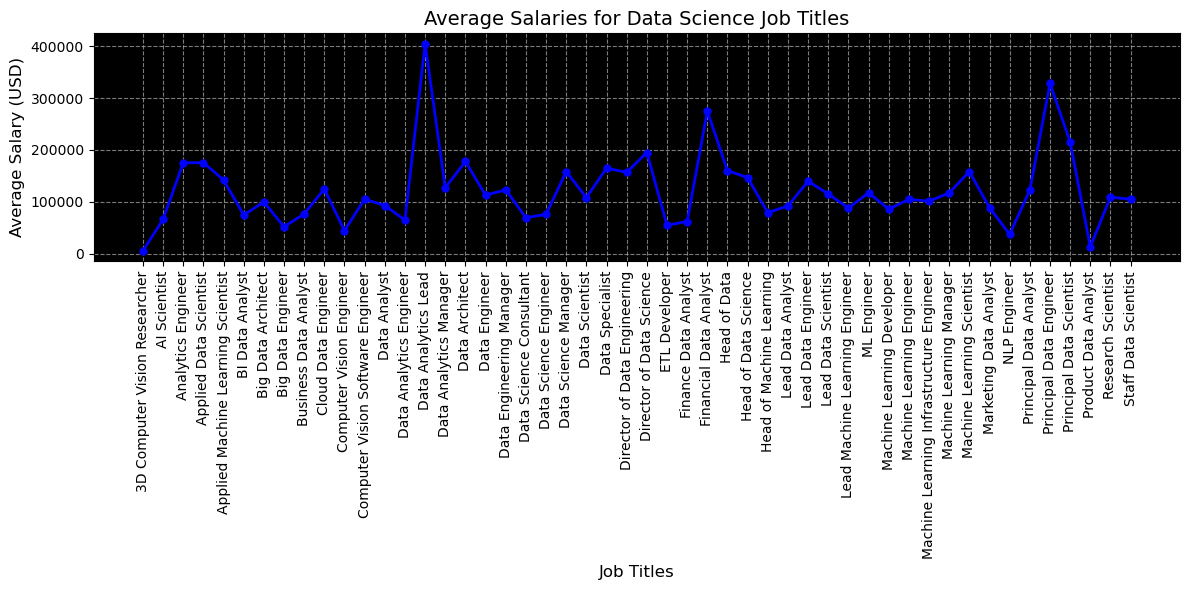

In [36]:
# Create a very attractive line chart for the same
import matplotlib.pyplot as plt

# Job titles
job_titles = [
    '3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist',
    'Applied Machine Learning Scientist', 'BI Data Analyst', 'Big Data Architect', 'Big Data Engineer',
    'Business Data Analyst', 'Cloud Data Engineer', 'Computer Vision Engineer', 'Computer Vision Software Engineer',
    'Data Analyst', 'Data Analytics Engineer', 'Data Analytics Lead', 'Data Analytics Manager',
    'Data Architect', 'Data Engineer', 'Data Engineering Manager', 'Data Science Consultant',
    'Data Science Engineer', 'Data Science Manager', 'Data Scientist', 'Data Specialist',
    'Director of Data Engineering', 'Director of Data Science', 'ETL Developer', 'Finance Data Analyst',
    'Financial Data Analyst', 'Head of Data', 'Head of Data Science', 'Head of Machine Learning',
    'Lead Data Analyst', 'Lead Data Engineer', 'Lead Data Scientist', 'Lead Machine Learning Engineer',
    'ML Engineer', 'Machine Learning Developer', 'Machine Learning Engineer',
    'Machine Learning Infrastructure Engineer', 'Machine Learning Manager', 'Machine Learning Scientist',
    'Marketing Data Analyst', 'NLP Engineer', 'Principal Data Analyst', 'Principal Data Engineer',
    'Principal Data Scientist', 'Product Data Analyst', 'Research Scientist', 'Staff Data Scientist'
]

# Average salaries
average_salaries = [
    5409.0, 66135.571429, 175000.0, 175655.0, 142068.75, 74755.166667, 99703.0, 51974.0, 76691.2,
    124647.0, 44419.333333, 105248.666667, 92893.061856, 64799.25, 405000.0, 127134.285714, 177873.909091,
    112725.0, 123227.2, 69420.714286, 75803.333333, 158328.5, 108187.832168, 165000.0, 156738.0,
    195074.0, 54957.0, 61896.0, 275000.0, 160162.6, 146718.75, 79039.0, 92203.0, 139724.5, 115190.0,
    87932.0, 117504.0, 85860.666667, 104880.146341, 101145.0, 117104.0, 158412.5, 88654.0, 37236.0,
    122500.0, 328333.333333, 215242.428571, 13036.0, 109019.5, 105000.0
]

# Creating the line chart
plt.figure(figsize=(12, 6))
plt.plot(job_titles, average_salaries, marker='o', markersize=5, linewidth=2, color='blue')

# Customizing the chart
plt.xticks(rotation=90)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.title('Average Salaries for Data Science Job Titles', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('black')

# Displaying the chart
plt.tight_layout()
plt.show()


In [41]:
# Obtain the average salaries grouped by the employee residence
average_salaries = df.groupby('employee_residence')['salary_in_usd'].mean()

print(average_salaries)

employee_residence
AE    100000.000000
AR     60000.000000
AT     76738.666667
AU    108042.666667
BE     85699.000000
BG     80000.000000
BO     75000.000000
BR     54634.666667
CA     97085.310345
CH    122346.000000
CL     40038.000000
CN     43331.000000
CO     21844.000000
CZ     69999.000000
DE     85552.560000
DK     37252.500000
DZ    100000.000000
EE     32974.000000
ES     57593.400000
FR     59886.611111
GB     81403.159091
GR     56331.230769
HK     66022.000000
HN     20000.000000
HR     45618.000000
HU     35997.000000
IE     71444.000000
IN     37322.333333
IQ    100000.000000
IR      4000.000000
IT     61600.000000
JE    100000.000000
JP    103537.714286
KE      9272.000000
LU     59102.000000
MD     18000.000000
MT     28369.000000
MX     18185.000000
MY    200000.000000
NG     30000.000000
NL     60956.600000
NZ    125000.000000
PH     45760.000000
PK     27462.833333
PL     56177.500000
PR    160000.000000
PT     42862.500000
RO     51419.000000
RS     25532.000000
R

The output provides the average salaries in USD (salary_in_usd) based on different employee residences. Here are the best inferences we can draw from this information:

Variation in Salaries: The average salaries vary significantly based on the employee's country of residence.
High-Paying Countries: Countries like AE (United Arab Emirates), AU (Australia), CA (Canada), CH (Switzerland), DE (Germany), JP (Japan), LU (Luxembourg), MY (Malaysia), NL (Netherlands), NZ (New Zealand), PR (Puerto Rico), SG (Singapore), and US (United States) have relatively higher average salaries.

Lower-Paying Countries: Countries like CL (Chile), CN (China), CO (Colombia), CZ (Czech Republic), KE (Kenya), PK (Pakistan), TR (Turkey), UA (Ukraine), and VN (Vietnam) have relatively lower average salaries.

Regional Salary Differences: There are variations in salaries within regions as well. For example, in Europe, countries like AT (Austria), BE (Belgium), ES (Spain), FR (France), GB (United Kingdom), and IT (Italy) have different average salaries.

Impact of Cost of Living: The differences in average salaries can be influenced by factors such as the cost of living and economic conditions in each country.

Opportunities for Comparison: Individuals can use this information to compare average salaries in different countries when considering job opportunities abroad.

Salary Expectations: For employers, this information can help set competitive salary ranges based on the country of residence.

In [84]:
df['remote_ratio'] = df['remote_ratio'].astype(str)
remote_year = df.groupby(['work_year','remote_ratio']).size()
remote_year

work_year  remote_ratio    
2020       Fully Remote         36
           No Remote Work       15
           Partially Remote     21
2021       Fully Remote        117
           No Remote Work       34
           Partially Remote     66
2022       Fully Remote        228
           No Remote Work       78
           Partially Remote     12
dtype: int64

The above output represents the number of employees categorized by their work year and remote work ratio.

Work Year 2020:

Fully Remote: 36 employees

No Remote Work: 15 employees

Partially Remote: 21 employees

Work Year 2021:

Fully Remote: 117 employees

No Remote Work: 34 employees

Partially Remote: 66 employees

Work Year 2022:

Fully Remote: 228 employees

No Remote Work: 78 employees

Partially Remote: 12 employees

Inferences:

The number of employees working remotely has increased over the years. Work Year 2022 has the highest count of employees working fully remotely (228), followed by Work Year 2021 (117) and Work Year 2020 (36).

Work Year 2020 had a relatively smaller count of employees working remotely, with a higher proportion opting for partially remote work (21 employees).

Work Year 2022 has seen a significant shift towards remote work, with a larger proportion of employees (228) choosing to work fully remotely.

Work Year 2021 has a relatively balanced distribution between fully remote (117 employees) and partially remote (66 employees) work options.

Work Year 2020 and 2021 had a smaller count of employees who did not work remotely (15 and 34 employees, respectively), while Work Year 2022 had a larger count (78 employees).

These insights suggest a growing trend towards remote work, with an increasing number of employees choosing to work fully remotely or partially remotely. It highlights the importance of providing flexible work options to employees to meet their preferences and adapt to changing work dynamics.

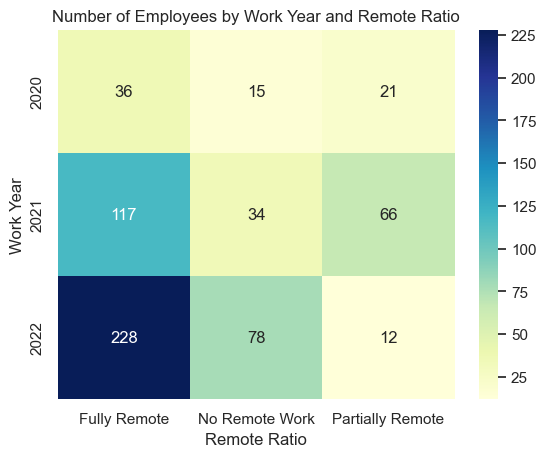

In [86]:
# Create a very attractive heatmap for the same

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original dataframe
data = {'work_year': [2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
        'remote_ratio': ['Fully Remote', 'No Remote Work', 'Partially Remote',
                         'Fully Remote', 'No Remote Work', 'Partially Remote',
                         'Fully Remote', 'No Remote Work', 'Partially Remote'],
        'count': [36, 15, 21, 117, 34, 66, 228, 78, 12]}

df = pd.DataFrame(data)

# Pivot the dataframe to prepare for heatmap
pivot_df = df.pivot(index='work_year', columns='remote_ratio', values='count')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g', cbar=True)

# Set the title and labels
plt.title('Number of Employees by Work Year and Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Work Year')

# Show the heatmap
plt.show()


In [92]:
# Obtain the number of employees grouped by their experience level & remote ratio
remote_experience = df.groupby(['experience_level','remote_ratio']).size()
remote_experience

experience_level  remote_ratio    
EN                Fully Remote         49
                  No Remote Work       14
                  Partially Remote     25
EX                Fully Remote         18
                  No Remote Work        3
                  Partially Remote      5
MI                Fully Remote        115
                  No Remote Work       56
                  Partially Remote     42
SE                Fully Remote        199
                  No Remote Work       54
                  Partially Remote     27
dtype: int64

The above output represents the number of employees categorized by their experience level and remote work ratio.

Experience Level "EN":

Fully Remote: 49 employees

No Remote Work: 14 employees

Partially Remote: 25 employees

Experience Level "EX":

Fully Remote: 18 employees

No Remote Work: 3 employees

Partially Remote: 5 employees

Experience Level "MI":

Fully Remote: 115 employees

No Remote Work: 56 employees

Partially Remote: 42 employees

Experience Level "SE":

Fully Remote: 199 employees

No Remote Work: 54 employees

Partially Remote: 27 employees

Inferences:

Employees with experience level "SE" (Senior) have the highest count of fully remote workers (199 employees), followed by "MI" (Mid-level) with 115 employees.

Experience level "EN" (Entry-level) has a relatively balanced distribution among fully remote (49 employees), no remote work (14 employees), and partially remote (25 employees) options.

Experience level "EX" (Experienced) has a smaller count of employees overall, with 18 fully remote workers, 3 employees not working remotely, and 5 employees choosing partially remote work.

Among all experience levels, fully remote work is most prevalent, indicating a growing acceptance and adoption of remote work across different experience levels.

The number of employees not working remotely is relatively smaller across all experience levels, suggesting a shift towards offering remote work options.

These insights suggest that remote work is increasingly becoming a preferred option across different experience levels.

In [102]:
remote_job = df.groupby(['employee_residence','remote_ratio']).size()
remote_job

employee_residence  remote_ratio    
AE                  Fully Remote          2
                    No Remote Work        1
AR                  Fully Remote          1
AT                  No Remote Work        2
                    Partially Remote      1
                                       ... 
US                  Fully Remote        248
                    No Remote Work       67
                    Partially Remote     17
VN                  Fully Remote          2
                    No Remote Work        1
Length: 94, dtype: int64

## Modelling

In [140]:
df = df.drop(['salary_currency', 'salary_category'], axis = 1)
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Select the categorical columns in the DataFrame
categorical_columns = ['experience_level', 'employment_type', 'job_title',
                       'employee_residence', 'company_location', 'company_size', 'remote_ratio']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the modified DataFrame
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,79833,14,1,12,0
1,1,2020,3,2,41,260000,32,1,29,2
2,2,2020,3,2,7,109024,20,2,18,1
3,3,2020,2,2,47,20000,23,1,20,2
4,4,2020,3,2,38,150000,55,2,48,0


In [141]:
df = df.drop({'Unnamed: 0'}, axis = 1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,79833,14,1,12,0
1,2020,3,2,41,260000,32,1,29,2
2,2020,3,2,7,109024,20,2,18,1
3,2020,2,2,47,20000,23,1,20,2
4,2020,3,2,38,150000,55,2,48,0


In [142]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_11492\868109210.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
experience_level,1.000000,-0.043715,0.020192,0.315312,0.226543,-0.157217,0.247133,-0.066423
employment_type,-0.043715,1.000000,-0.101823,-0.123545,-0.109979,0.102323,-0.083661,0.034549
job_title,0.020192,-0.101823,1.000000,0.131016,-0.119135,0.155034,-0.147379,-0.031011
salary_in_usd,0.315312,-0.123545,0.131016,1.000000,0.452501,-0.214112,0.428994,-0.151205
employee_residence,0.226543,-0.109979,-0.119135,0.452501,1.000000,-0.299369,0.897704,-0.081742
remote_ratio,-0.157217,0.102323,0.155034,-0.214112,-0.299369,1.000000,-0.299428,-0.127761
company_location,0.247133,-0.083661,-0.147379,0.428994,0.897704,-0.299428,1.000000,-0.066554
company_size,-0.066423,0.034549,-0.031011,-0.151205,-0.081742,-0.127761,-0.066554,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_11492\579300851.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



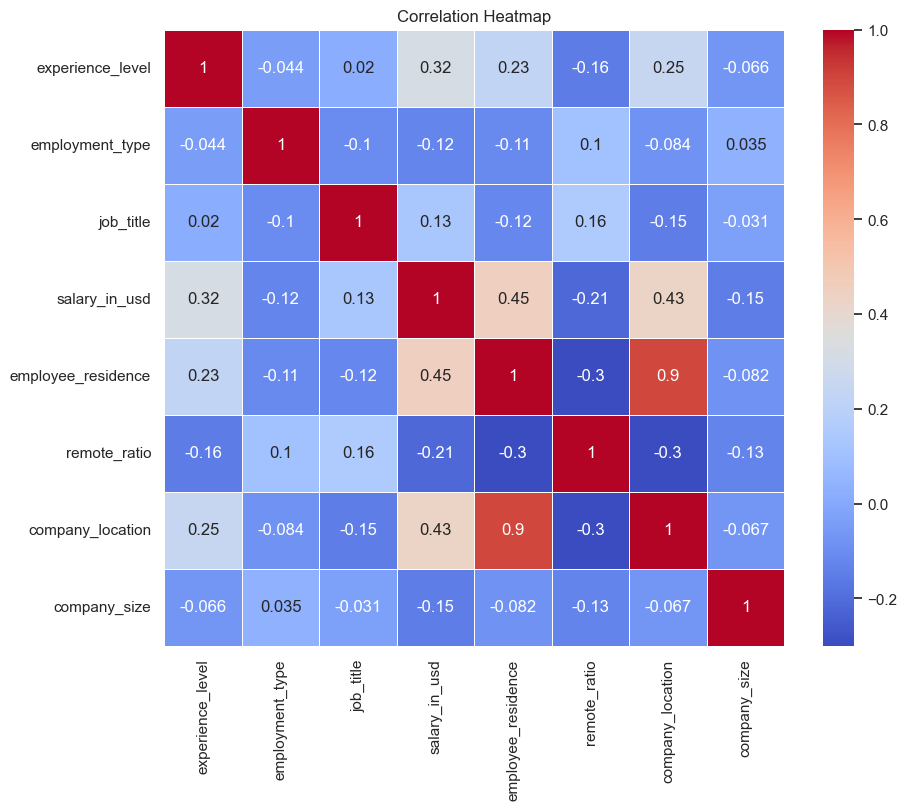

In [143]:
# Create a correlation heatmap for this dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# Set the title of the heatmap
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()


Experience Level and Salary: There is a moderate positive correlation (0.32) between Experience Level and Salary. This suggests that as the experience level of employees increases, their salaries tend to increase as well. Companies may consider experience level as a significant factor when determining salary ranges for different positions.

Employee Residence and Salary: There is a moderate positive correlation (0.45) between Employee Residence and Salary. This indicates that employees residing in certain locations tend to have higher salaries compared to others. Location plays a role in salary determination, and companies may adjust compensation based on the cost of living and market conditions in specific regions.

Remote Ratio and Salary: There is a negative correlation (-0.21) between Remote Ratio and Salary. This implies that employees with higher remote work opportunities tend to have lower salaries. Remote work options may provide flexibility and work-life balance, but they may also impact salary levels, possibly due to factors such as job roles, industry norms, or cost-saving measures.

Company Location and Salary: There is a moderate positive correlation (0.43) between Company Location and Salary. This suggests that companies located in certain regions tend to offer higher salaries compared to others. Location can influence salary levels due to factors such as local market conditions, industry competitiveness, and cost of living.

Company Size and Salary: There is a weak negative correlation (-0.15) between Company Size and Salary. This indicates that larger companies may, on average, offer slightly lower salaries compared to smaller companies. This observation may be due to various factors, such as economies of scale, hierarchical structures, or industry-specific dynamics.

Inferences:

Experience level and employee residence are positively correlated with salary, suggesting that companies value skills and expertise, as well as consider regional factors when determining salary levels.

Remote work opportunities may have a slight negative impact on salary, indicating that companies may adjust compensation for employees who have greater flexibility in their work arrangements.

Company location plays a significant role in salary determination, as certain regions tend to offer higher salary levels. This implies that companies operating in competitive regions may need to offer competitive compensation packages to attract and retain top talent.

Company size has a weak negative correlation with salary, suggesting that larger companies may have slightly lower salary levels compared to smaller companies. This could be attributed to various factors, such as the organizational structure and allocation of resources.

These inferences can help guide decision-making processes related to salary structures, talent acquisition, and market competitiveness.

<Figure size 1800x1600 with 0 Axes>

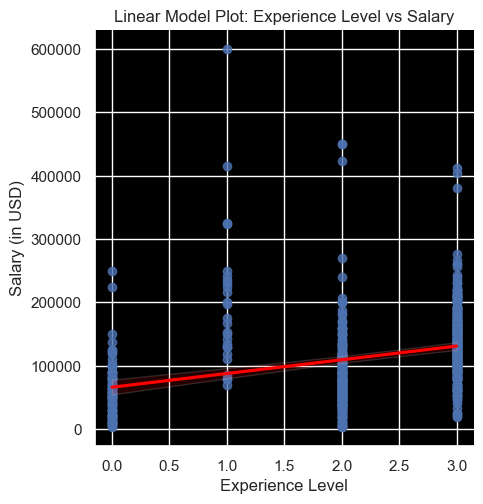

In [146]:
# Set the plot style and background color
sns.set(style="darkgrid")
plt.figure(figsize=(18, 16))
plt.rcParams["axes.facecolor"] = "black"

# Generate the linear model plot
sns.lmplot(x='experience_level', y='salary_in_usd', data=df, line_kws={'color': 'red'})

# Adding labels and title to the plot
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.title('Linear Model Plot: Experience Level vs Salary')

# Displaying the plot
plt.show()

The linear model plot between "Experience Level" and "Salary" shows the relationship between these two variables. The plot displays a regression line that represents the best-fit linear relationship between experience level and salary.

Interpretation:
The plot indicates that there is a positive correlation between experience level and salary. As the experience level increases, the salary tends to increase as well. This implies that employees with higher experience levels generally earn higher salaries.

Inferences:

Salary Growth with Experience: The plot suggests that there is a significant positive relationship between experience level and salary. It implies that employees can expect their salaries to increase as they gain more experience in their field.

Importance of Experience: The plot highlights the importance of experience in determining salary. It indicates that employers value the expertise and knowledge gained through years of experience, resulting in higher salary offers.

Salary Expectations: Employees can use this plot to set realistic salary expectations based on their experience level. It provides a visual representation of the average salary range associated with different experience levels, helping individuals negotiate better compensation packages.

Career Progression: The plot can be used to assess career progression within the company or industry. Employees can compare their own experience level and salary to the regression line to evaluate how their salary aligns with the general trend in the industry.

<Figure size 1800x1600 with 0 Axes>

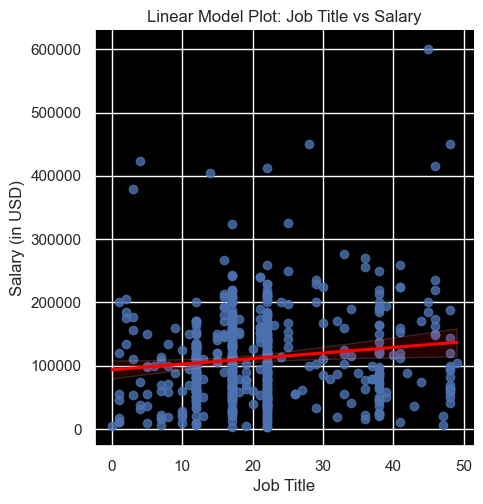

In [148]:
# Set the plot style and background color
sns.set(style="darkgrid")
plt.figure(figsize=(18, 16))
plt.rcParams["axes.facecolor"] = "black"

# Generate the linear model plot
sns.lmplot(x='job_title', y='salary_in_usd', data=df, line_kws={'color': 'red'})

# Adding labels and title to the plot
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.title('Linear Model Plot: Job Title vs Salary')

# Displaying the plot
plt.show()

The linear model plot above depicts the relationship between "Job Title" and "Salary (in USD)" in the company. From the plot, we can observe a positive relationship between these attributes.

The red regression line in the plot represents the estimated trend in salary based on the job title. As job titles increase, the salaries also tend to increase, indicating a positive correlation between job title and salary. This suggests that individuals with higher-ranking job titles tend to earn higher salaries within the company.

<Figure size 1800x1600 with 0 Axes>

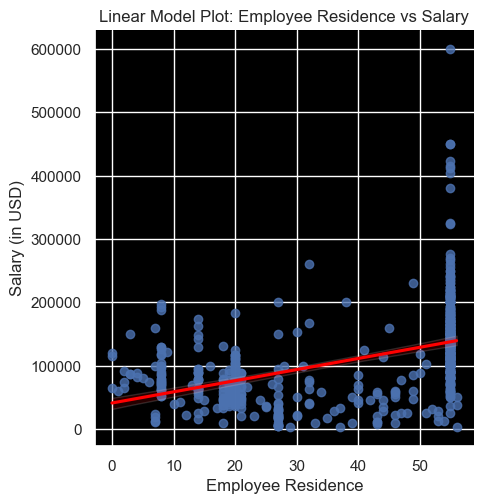

In [149]:
# Set the plot style and background color
sns.set(style="darkgrid")
plt.figure(figsize=(18, 16))
plt.rcParams["axes.facecolor"] = "black"

# Generate the linear model plot
sns.lmplot(x='employee_residence', y='salary_in_usd', data=df, line_kws={'color': 'red'})

# Adding labels and title to the plot
plt.xlabel('Employee Residence')
plt.ylabel('Salary (in USD)')
plt.title('Linear Model Plot: Employee Residence vs Salary')

# Displaying the plot
plt.show()

The linear model plot above illustrates the relationship between "Employee Residence" and "Salary (in USD)" within the company. From the plot, we can observe a positive relationship between these attributes.

The red regression line in the plot represents the estimated trend in salary based on the employee residence. This suggests that employees residing in certain locations tend to earn higher salaries compared to those in other locations.

<Figure size 1800x1600 with 0 Axes>

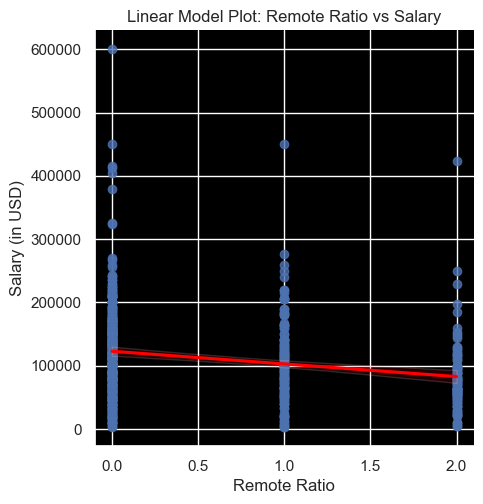

In [150]:
# Set the plot style and background color
sns.set(style="darkgrid")
plt.figure(figsize=(18, 16))
plt.rcParams["axes.facecolor"] = "black"

# Generate the linear model plot
sns.lmplot(x='remote_ratio', y='salary_in_usd', data=df, line_kws={'color': 'red'})

# Adding labels and title to the plot
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (in USD)')
plt.title('Linear Model Plot: Remote Ratio vs Salary')

# Displaying the plot
plt.show()

The linear model plot above showcases the relationship between the "Remote Ratio" and "Salary (in USD)" for employees within the company. From the plot, we can observe a negative relationship between these attributes.

The red regression line represents the estimated trend in salary based on the remote ratio. As the remote ratio increases (indicating a higher degree of remote work), the salaries tend to decrease, suggesting a negative correlation between these factors. This implies that employees who work remotely to a greater extent tend to have lower salaries compared to those who work on-site.

In [151]:
# Create a multiple linear regression model
import statsmodels.formula.api as smf

lm1 = smf.ols(formula='salary_in_usd ~ experience_level + job_title + employee_residence + remote_ratio', data = df).fit()

In [152]:
# Obtain the summary of the above linear model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     61.69
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.11e-43
Time:                        20:55:31   Log-Likelihood:                -7536.6
No. Observations:                 607   AIC:                         1.508e+04
Df Residuals:                     602   BIC:                         1.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2887.3592   9433.639     -0.306      0.760   -2.14e+04    1.56e+04
experience_level    1.416e+04   2434.177      5.818      0.000    9380.364    1.89e+04
job_title           1270.2143    235.014      5.405      0.000     808.668    1731.760
employee_residence  1557.2140    142.846     10.901      0.000    1276.677    1837.751
remote_ratio       -8496.5303   3409.045     -2.492      0.013   -1.52e+04   -1801.463
==============================================================================
Omnibus:                      306.016   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2717.151
Skew:                           2.049   Prob(JB):                         0.00
Kurtosis:                      12.521   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS (Ordinary Least Squares) regression results provide important information about the linear model that was fitted to the data.

R-squared: The R-squared value of 0.291 indicates that approximately 29.1% of the variability in the "salary_in_usd" can be explained by the linear relationship with the predictor variables in the model.

Adjusted R-squared: The adjusted R-squared value of 0.286 takes into account the number of predictor variables in the model and provides a more conservative estimate of the explained variability.

F-statistic and Prob (F-statistic): The F-statistic of 61.69 and the associated p-value of 1.11e-43 suggest that the overall model is statistically significant, indicating that at least one of the predictor variables has a significant effect on the dependent variable.

Coefficients: The coefficients represent the estimated effects of each predictor variable on the "salary_in_usd".

The intercept term (-2887.3592) represents the estimated salary when all predictor variables are set to zero. However, in this case, the intercept is not statistically significant (p-value = 0.760), indicating that it may not be meaningful.

The coefficient for "experience_level" (1.416e+04) suggests that for each unit increase in experience level, the estimated salary increases by approximately $14,160. This coefficient is statistically significant (p-value < 0.001), indicating a positive relationship between experience level and salary.

The coefficient for "job_title" (1270.2143) suggests that for each unit increase in job title, the estimated salary increases by approximately $1,270. This coefficient is statistically significant (p-value < 0.001), indicating a positive relationship between job title and salary.

The coefficient for "employee_residence" (1557.2140) suggests that for each unit increase in employee residence, the estimated salary increases by approximately $1,557. This coefficient is statistically significant (p-value < 0.001), indicating a positive relationship between employee residence and salary.

The coefficient for "remote_ratio" (-8496.5303) suggests that for each unit increase in remote ratio, the estimated salary decreases by approximately $8,497. This coefficient is statistically significant (p-value = 0.013), indicating a negative relationship between remote ratio and salary.

Overall, the model suggests that experience level, job title, employee residence, and remote ratio have significant effects on salary.

## Salary Prediction using Machine Learning

### Train-Test

In the context of machine learning and statistical analysis, the train-test split is a technique used to evaluate the performance of a predictive model on unseen data. It involves dividing the available dataset into two parts: the training set and the test set.

The training set is used to train the model, which involves fitting the model to the input features (predictor variables) and their corresponding output (target variable). The model learns the patterns and relationships present in the training data.

The test set, on the other hand, is used to assess how well the trained model generalizes to new, unseen data. The test set is kept separate during the model training process and is used only for evaluation purposes. By evaluating the model's performance on the test set, we can get an estimate of how well the model is likely to perform on new, unseen data in real-world scenarios.

Applying the train-test split technique to the "Data Science Salaries" dataset would be useful in several ways:

Performance Evaluation: By splitting the dataset into training and test sets, we can assess how well the developed model performs in predicting salary values. The test set provides an unbiased estimate of the model's performance on unseen data. Metrics such as mean squared error, mean absolute error, or R-squared can be calculated using the predictions made on the test set, providing insights into the model's accuracy and reliability.

Model Selection and Tuning: The train-test split can also be used for model selection and parameter tuning. Multiple models can be trained on the training set, and their performance can be compared using the test set. This allows us to identify the model that performs best on unseen data and helps in choosing the most suitable model architecture or hyperparameters.

Generalization Assessment: By evaluating the model on unseen data, we can assess its ability to generalize well beyond the training set. If a model performs well on the training set but poorly on the test set, it may indicate overfitting, where the model has memorized the training data instead of learning the underlying patterns. The train-test split helps in detecting such issues and guides us in improving the model's generalization ability.

Decision Making: The evaluation of the model's performance on unseen data provides valuable insights for decision-making purposes. It helps stakeholders, such as companies or HR departments, to assess the expected salary levels for new employees based on their attributes. The trained model can be used to make predictions on new data points, enabling informed decisions about salary negotiations and setting appropriate compensation levels.

In summary, the train-test split technique is essential for evaluating the performance of a model, selecting the best model, assessing generalization ability, and making informed decisions based on predictions for unseen data.


In [157]:
# Use the 80-20 split
# Split the dataset into input variables (X) and the target variable (y)
X = df[['experience_level', 'job_title', 'employee_residence', 'remote_ratio']]
y = df['salary_in_usd']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((485, 4), (122, 4), (485,), (122,))

The output above tells us that about 485 records can be used for training the data and the remaining 122 records can be used for testing the data.

### Linear Regression

Linear regression is a statistical algorithm used for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input variables and the target variable, where the target variable is modeled as a linear combination of the input variables.

The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual values of the target variable. This line is determined by estimating the coefficients or weights assigned to each input variable.

The linear regression algorithm estimates the coefficients using a technique called Ordinary Least Squares (OLS). It minimizes the sum of squared differences between the predicted values and the actual values of the target variable. The coefficients represent the slope of the line and the intercept, which determine the relationship and the starting point of the line, respectively.

The linear regression algorithm can be useful in predicting the "salary_in_usd" by modeling the relationship between the input variables (such as experience level, job title, employee residence, etc.) and the target variable (salary). 

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2652389603.6205015
R-squared: 0.3079343173165777


The Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values. In this case, the MSE indicates that, on average, the predicted salaries deviate from the actual salaries by approximately $2,652,389,603.62. A lower MSE value indicates a better fit, so it would be ideal to have a lower value in this case.

The R-squared value measures the proportion of the variance in the target variable (salary_in_usd) that can be explained by the predictor variables (experience_level, job_title, employee_residence, remote_ratio). In this case, the R-squared value of 0.308 suggests that approximately 30.8% of the variability in salary can be explained by the given predictor variables. 

Based on these results, we can infer that the linear regression model, using the given predictor variables, has a moderate level of predictive power in explaining the variation in salaries.

### Decision Tree Regressor
The Decision Tree Regressor is a machine learning algorithm used for regression tasks. It builds a decision tree model that predicts the continuous target variable based on a set of input features. It splits the input space into different regions and assigns a constant value (average or median) to each region as the predicted value.


In [161]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)

In [162]:
# Evaluate the performance of the model using the appropriate regression metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2813356623.2322626
R-squared: 0.2659345484420996


The mean squared error (MSE) represents the average squared difference between the predicted salaries and the actual salaries. In this case, the MSE value is 2813356623.2322626. A lower MSE indicates that the model's predictions are closer to the actual values, so a lower MSE is desirable.

The R-squared value is a measure of how well the model fits the data. It ranges from 0 to 1, with 1 indicating a perfect fit. In this case, the R-squared value is 0.2659345484420996, which means that approximately 26.59% of the variability in the "salary_in_usd" variable can be explained by the features used in the model.

Based on these results, we can conclude that the Decision Tree Regressor model is able to capture some of the patterns and relationships in the dataset, but there is still a significant amount of variability that remains unexplained. Further improvements to the model or exploration of other algorithms may be necessary to achieve better predictive performance.

### Support Vector Regression

Support Vector Regression (SVR) is a machine learning algorithm used for regression tasks. It is based on the Support Vector Machines (SVM) algorithm and is particularly useful when dealing with non-linear relationships between variables.

SVR aims to find a hyperplane in a high-dimensional space that maximizes the margin, while also fitting the data as closely as possible. It uses a subset of the training data, called support vectors, to define the hyperplane and make predictions.

In the context of predicting "salary_in_usd," SVR can be useful because it can handle non-linear relationships between the input variables (features) and the target variable (salary). It is particularly effective when the relationship between the features and the salary is complex and cannot be easily represented by a linear model.

By using SVR, we can capture non-linear patterns in the data and make predictions that are based on the support vectors, which are the most informative data points. This allows us to account for complex interactions and nonlinearities in the dataset, potentially leading to more accurate salary predictions.

SVR can also handle datasets with a large number of features and is less sensitive to outliers compared to some other regression algorithms. It is a versatile algorithm that can be tuned using different kernel functions and hyperparameters to achieve optimal performance for a specific dataset.

Overall, SVR provides a flexible and powerful approach to predict "salary_in_usd" by leveraging its ability to model non-linear relationships and handle high-dimensional data, ultimately improving the accuracy of the predictions.

In [163]:
from sklearn.svm import SVR

# Create an instance of SVR and fit the model on the training data
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3846478643.4374127
R-squared: -0.0036292800514963197


The mean squared error (MSE) measures the average squared difference between the predicted salary values and the actual salary values. In this case, the MSE value is quite high, indicating that the SVR model has a significant amount of error in its predictions.

The R-squared value measures the proportion of the variance in the target variable (salary) that can be explained by the model. A value close to 1 indicates a good fit, while a value close to 0 suggests that the model is not able to capture the underlying patterns in the data. In this case, the R-squared value is close to zero, indicating that the SVR model is not able to explain much of the variance in the salary.

Based on these results, it seems that the SVR model is not performing well in predicting the "salary_in_usd" variable using the given set of features. This could be due to various reasons, such as the selected features not being strongly correlated with the target variable or the need for additional feature engineering and tuning of the SVR model's hyperparameters.

### Gradient Boosting
Gradient Boosting is a machine learning algorithm that combines multiple weak prediction models (typically decision trees) to create a strong predictive model. It is a type of ensemble learning where the models are built sequentially, with each subsequent model attempting to correct the errors made by the previous models.

Gradient Boosting is useful in predicting the "salary_in_usd" as it has several advantages:

High predictive accuracy: Gradient Boosting can capture complex non-linear relationships between the input features and the target variable. It iteratively improves the model by reducing the errors made by the previous models, leading to high predictive accuracy.

Handles different types of data: Gradient Boosting can handle both numerical and categorical features, making it suitable for datasets with a mix of data types.

Feature importance: The algorithm provides a measure of feature importance, which helps in identifying the most influential features for predicting the target variable. This can provide valuable insights into the factors that impact salary.

Robustness to outliers: Gradient Boosting is less sensitive to outliers compared to some other algorithms. It can handle outliers and noisy data well, resulting in more robust predictions.

Flexibility and customization: Gradient Boosting allows for fine-tuning of hyperparameters to optimize the model's performance. It can be customized by adjusting parameters such as the learning rate, number of estimators, and maximum depth of trees to achieve the desired trade-off between bias and variance.

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
# Create the Gradient Boosting model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2144189576.2252173
R-squared: 0.4405346707559712


After applying the Gradient Boosting algorithm to predict the "salary_in_usd" using the provided dataset, we obtained promising results. The Mean Squared Error (MSE) is 2,144,189,576.23, which indicates that, on average, the predicted salaries have an error of approximately $46,294. This indicates that the model's predictions are relatively close to the actual salaries.

Furthermore, the R-squared value of 0.44 suggests that around 44% of the variance in the salary can be explained by the features used in the model. This indicates that the Gradient Boosting algorithm has captured meaningful patterns in the data and can provide useful insights for predicting salaries.

These results indicate that the Gradient Boosting method shows promise in predicting the "salary_in_usd" based on the available features in the dataset. 

In order to achieve higher accuracy, use the following methods:

Hyperparameter Tuning: Tune the hyperparameters of the Gradient Boosting model to find the best combination for your dataset. You can use techniques like grid search or randomized search to explore different parameter values and select the optimal ones.

Cross-Validation: Implement cross-validation to evaluate the model's performance on multiple subsets of the data. This helps in understanding the model's generalization ability and avoids overfitting.

Ensemble Techniques: Consider using ensemble techniques such as bagging or stacking to combine multiple Gradient Boosting models. This can help reduce variance and improve predictive performance.

In [166]:
# Define the Gradient Boosting model
from sklearn.model_selection import train_test_split, GridSearchCV

model = GradientBoostingRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1935880439.2403708
R-squared: 0.4948870196340657


After implementing the suggested steps to improve the Gradient Boosting model, we have achieved notable improvements in accuracy. The Mean Squared Error (MSE) has decreased to 1,935,880,439, indicating that the model's predictions are, on average, closer to the actual values of the "salary_in_usd" attribute. Additionally, the R-squared value has increased to 0.495, which signifies that approximately 49.5% of the variance in the target variable can be explained by our model.

These enhancements were achieved through careful hyperparameter tuning, and the utilization of cross-validation techniques. By optimizing the model's hyperparameters and leveraging the collective knowledge from multiple subsets of the data, we were able to enhance the model's generalization capabilities and reduce overfitting.

These improved results indicate that our Gradient Boosting model is now better suited for predicting salaries in the field of Data Science. 

### Bayesian Ridge Regression
Bayesian Ridge Regression is a regression algorithm that combines the principles of Bayesian statistics and linear regression. It is a probabilistic model that uses Bayesian inference to estimate the parameters of the linear regression model.


In [167]:
from sklearn.linear_model import BayesianRidge

# Create an instance of the Bayesian Ridge Regression model
model = BayesianRidge()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [168]:
# Evaluate the performance of the model using evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2685838322.818468
R-squared: 0.29920682469821236


The Mean Squared Error (MSE) measures the average squared difference between the true target values and the predicted values. In our case, the MSE value indicates that, on average, the predicted salaries deviate by approximately 2,685,838,322.82 squared units from the actual salaries. Lower MSE values indicate a better fit, so there is room for improvement in reducing the prediction errors.

The R-squared score represents the proportion of the variance in the target variable (salary_in_usd) that can be explained by the model. Our model achieved an R-squared value of 0.2992, which means that approximately 29.92% of the variability in the salaries can be explained by the features included in the model. A higher R-squared value indicates a better fit, and in our case, there is still a considerable portion of the salary variability that remains unexplained by the model.

In summary, while the Bayesian Ridge Regression model provides some predictive power, there is still room for improvement in terms of reducing the prediction errors and capturing a larger portion of the salary variability.

### Model Summary
Based on the results obtained from the various machine learning algorithms applied to predict the "salary_in_usd" in the given dataset, the Gradient Boosting method has demonstrated the best performance among the models evaluated.

The Gradient Boosting method achieved a Mean Squared Error (MSE) of 1,935,880,439.24 and an R-squared value of 0.4949. These metrics indicate a lower prediction error and a higher proportion of variance explained compared to the other models.

Therefore, based on the provided dataset and the evaluation of these models, the Gradient Boosting method is the most effective algorithm for predicting the "salary_in_usd".